# Model Testset Performance Comparison
## Lawrence He and Felipe Giuste (2022-09-08)

In [6]:
import sys, os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

## Metrics ##
from sklearn.metrics import confusion_matrix, matthews_corrcoef, f1_score, accuracy_score, classification_report

### Seed ###
random_state = 1234
np.random.seed(random_state)

## User Variables

In [7]:
## Folder paths ##
data_folder = '../Data/'
results_folder='../Results/'
models_folder='../Models/'
figures_folder ='../Figures/Performance/'

## Outcome variable ##
outcome_column='ckd_status'

## Load Performance Dictionary

In [8]:
## Load ##
with open( f'{models_folder}/Test_Performance.pkl', 'rb' ) as fh:
    performance_dict = pickle.load( file=fh )

## Load Data

In [9]:
### Load ###
test_data = pd.read_csv(data_folder+'test_data.csv')

### Feature list ###
feature_list = list()
for i in test_data.columns:
    if i[:2] == 'F_':
        feature_list.append(i)
        
### Setup Datasets ###
y_test = test_data[outcome_column]

/var/folders/65/qxp2fcwj00bff0rdg3hmhyx80000gn/T/ipykernel_66535/2323148330.py:2: DtypeWarning: Columns (30,41,42,66,67,68,69,83,87,103,104,105,121,122,123) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(data_folder+'test_data.csv')


# Confusion Matrix

NameError: name 'performance_dict' is not defined

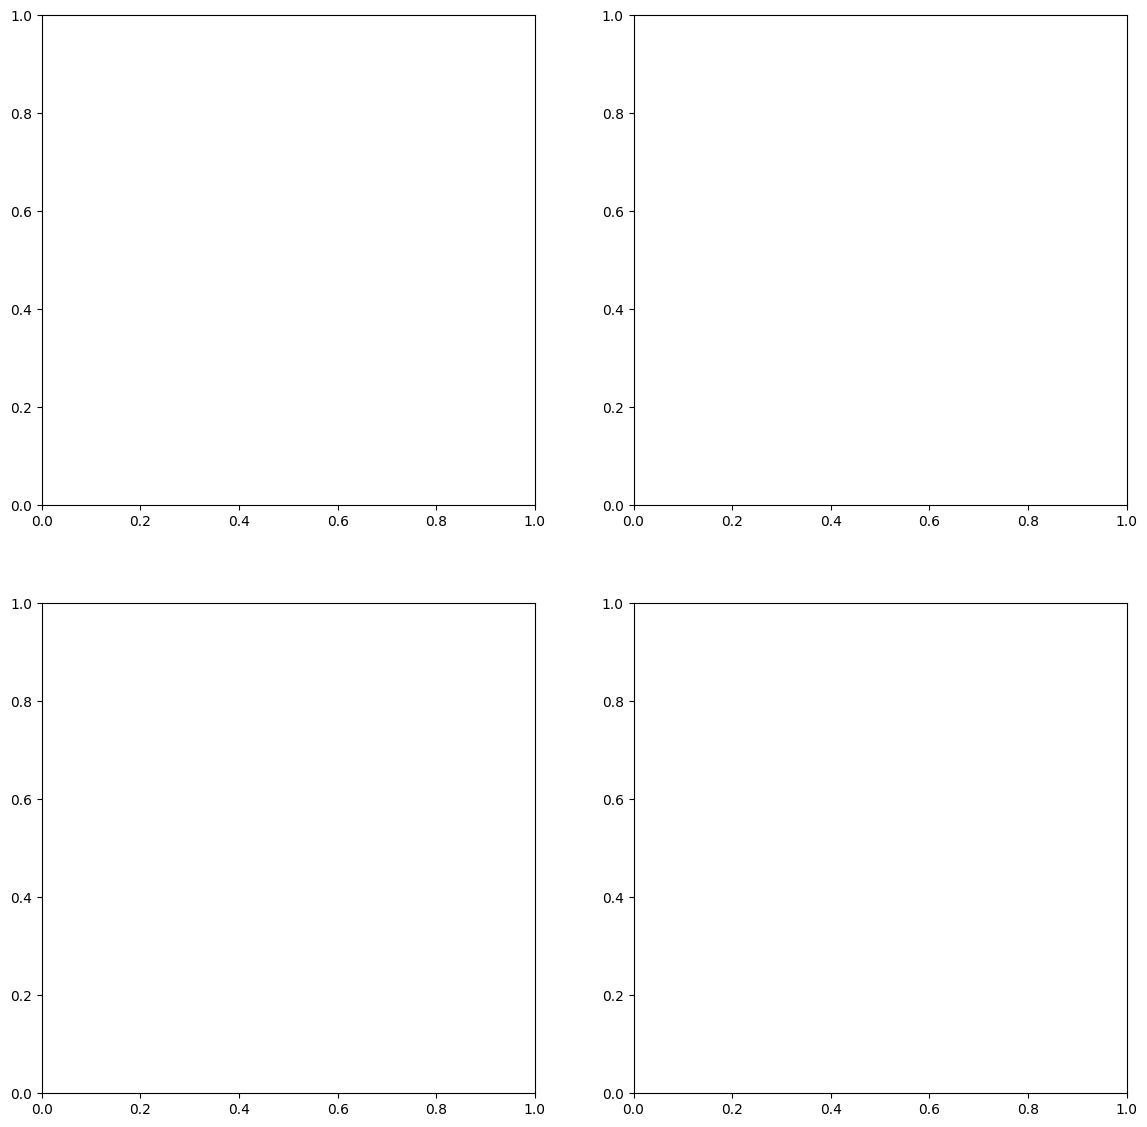

In [10]:
## Plot ##
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
## Prediction Binarization thresholds to test ##
thresholds = np.arange(0,1,1E-3)

### XGBoost: All Features ###
title='XGBoost: All Features'
threshold = performance_dict['XGBoostClassifier']['All Features']['threshold']
predictions = performance_dict['XGBoostClassifier']['All Features']['y_pred'] > threshold
ax_current=ax[0,0]

confusion_matrix_data = confusion_matrix( y_true=y_test, y_pred=predictions, normalize='true' )
## heatmap ##
hmap = sns.heatmap(confusion_matrix_data, annot=True, square=True,
            xticklabels= ['Pred: 0', 'Pred: 1'],
            yticklabels= ['True: 0', 'True: 1'],
            robust=True,
            annot_kws={'fontsize':20},
            cbar_kws={'pad':0, 'shrink': 0.82},
                   ax=ax_current
           )
## Axis label size ##
hmap.set_xticklabels(hmap.get_xmajorticklabels(), fontsize = 18)
hmap.set_yticklabels(hmap.get_ymajorticklabels(), fontsize = 18)
## Colorbar fontsize ##
hmap.collections[0].colorbar.ax.tick_params(labelsize=12)
## Title ##
ax_current.set_title(title, fontsize=20)




### XGBoost: Top10 ###
title='XGBoost: Top10 Features'
threshold = performance_dict['XGBoostClassifier']['Top10 Features']['threshold']
predictions = performance_dict['XGBoostClassifier']['Top10 Features']['y_pred'] > threshold
ax_current=ax[0,1]

confusion_matrix_data = confusion_matrix( y_true=y_test, y_pred=predictions, normalize='true' )
## heatmap ##
hmap = sns.heatmap(confusion_matrix_data, annot=True, square=True,
            xticklabels= ['Pred: 0', 'Pred: 1'],
            yticklabels= ['True: 0', 'True: 1'],
            robust=True,
            annot_kws={'fontsize':20},
            cbar_kws={'pad':0, 'shrink': 0.82},
                   ax=ax_current
           )
## Axis label size ##
hmap.set_xticklabels(hmap.get_xmajorticklabels(), fontsize = 18)
hmap.set_yticklabels(hmap.get_ymajorticklabels(), fontsize = 18)
## Colorbar fontsize ##
hmap.collections[0].colorbar.ax.tick_params(labelsize=12)
## Title ##
ax_current.set_title(title, fontsize=20)


### ReLu: All Features ###
title='ReLu Variant: All Features'
threshold = performance_dict['relu']['All Features']['threshold']
predictions = performance_dict['relu']['All Features']['y_pred'] > threshold
ax_current=ax[1,0]

confusion_matrix_data = confusion_matrix( y_true=y_test, y_pred=predictions, normalize='true' )
## heatmap ##
hmap = sns.heatmap(confusion_matrix_data, annot=True, square=True,
            xticklabels= ['Pred: 0', 'Pred: 1'],
            yticklabels= ['True: 0', 'True: 1'],
            robust=True,
            annot_kws={'fontsize':20},
            cbar_kws={'pad':0, 'shrink': 0.82},
                   ax=ax_current
           )
## Axis label size ##
hmap.set_xticklabels(hmap.get_xmajorticklabels(), fontsize = 18)
hmap.set_yticklabels(hmap.get_ymajorticklabels(), fontsize = 18)
## Colorbar fontsize ##
hmap.collections[0].colorbar.ax.tick_params(labelsize=12)
## Title ##
ax_current.set_title(title, fontsize=20)


### ReLu: Top10 ###
### ReLu: All Features ###
title='ReLu Variant: Top10 Features'
threshold = performance_dict['relu']['Top10 Features']['threshold']
predictions = performance_dict['relu']['Top10 Features']['y_pred'] > threshold
ax_current=ax[1,1]

confusion_matrix_data = confusion_matrix( y_true=y_test, y_pred=predictions, normalize='true' )
## heatmap ##
hmap = sns.heatmap(confusion_matrix_data, annot=True, square=True,
            xticklabels= ['Pred: 0', 'Pred: 1'],
            yticklabels= ['True: 0', 'True: 1'],
            robust=True,
            annot_kws={'fontsize':20},
            cbar_kws={'pad':0, 'shrink': 0.82},
                   ax=ax_current
           )
## Axis label size ##
hmap.set_xticklabels(hmap.get_xmajorticklabels(), fontsize = 18)
hmap.set_yticklabels(hmap.get_ymajorticklabels(), fontsize = 18)
## Colorbar fontsize ##
hmap.collections[0].colorbar.ax.tick_params(labelsize=12)
## Title ##
ax_current.set_title(title, fontsize=20)


## Save Figure ##
plt.tight_layout()
plt.savefig(f'{figures_folder}/Confusion_Matrices.pdf')
plt.show()